<a href="https://colab.research.google.com/github/davidfague/Computational-Neuroscience-tutorials/blob/main/B3_CableTheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This lab will be used to introduce you to multicompartmental models and introduce you to Cable Theory illustrated by a passive axon.

In [1]:
!pip install neuron

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 77.1 MB/s eta 0:00:00


In [2]:
from neuron import h
import matplotlib.pyplot as plt
import numpy as np

In [3]:
h.load_file('stdrun.hoc')

1.0

In [4]:
# define our axon geometry
axon = h.Section('axon') # create neuron Section hoc object
diam = 6 # micrometer
length = 12000 # micrometer
axon.pt3dadd(0,0,0,diam) # (x,y,z,diam) add 3d coordinate
axon.pt3dadd(length,0,0,diam) # (x,y,z,diam)
print(axon.L)
print(axon.diam)
#axon.L = 1000 # micrometer
#axon.diam = 2 # micrometer
axon.nseg = 21 # number of evenly-lengthed, computational compartments per section (segments are compartments that divide up the entire section)

12000.0
6.0


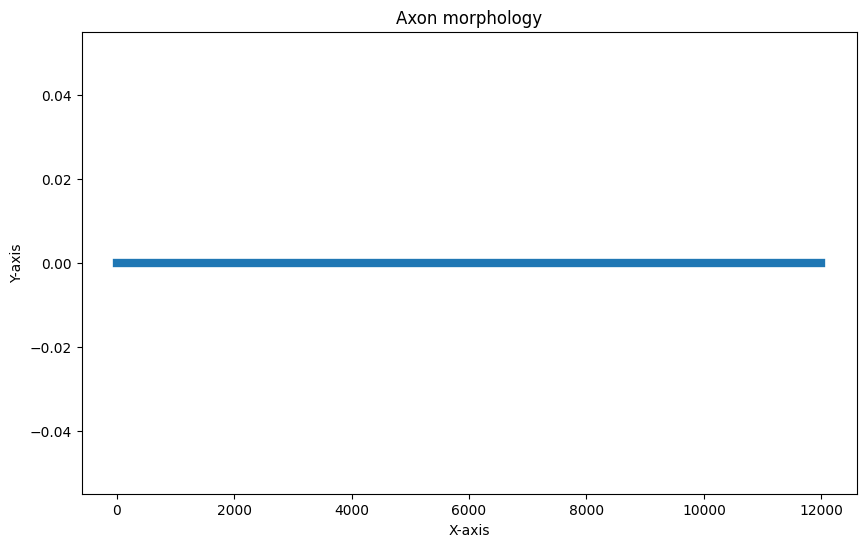

In [5]:
# visualize axon
xcoords=[]
ycoords=[]
for i_3d in range(axon.n3d()): # for 3d coordinate index in range(number of 3d coordinates)
  xcoords.append(axon.x3d(i_3d)) # print x3d coordinate
  ycoords.append(axon.y3d(i_3d))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(xcoords, ycoords, linewidth= axon.diam)

# Add title and labels
plt.title('Axon morphology')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()

In [6]:
for seg in axon:
  print(seg.x) # center of segment along the section (0 is beginning of section and 1 is end of the section)

0.023809523809523808
0.07142857142857142
0.11904761904761904
0.16666666666666666
0.21428571428571427
0.2619047619047619
0.30952380952380953
0.35714285714285715
0.40476190476190477
0.4523809523809524
0.5
0.5476190476190477
0.5952380952380952
0.6428571428571429
0.6904761904761905
0.7380952380952381
0.7857142857142857
0.8333333333333334
0.8809523809523809
0.9285714285714286
0.9761904761904762


In [7]:
# 1/10000

In [8]:
# define axon membrane biophysics
axon.insert('pas') # passive channel

axon.e_pas = -70 # reveral potential mV (resting membrane potential in passive case)
axon.cm = 1 # membrane capacitance uF/cm2

# define leak conductance, axons are myelinated and have much less leak.
axon.g_pas = (2.0e-4) #soma:2.0e-5 # leak channel S/cm2
axon.Ra = 100 # axial resistivity ohm-cm

In [9]:
# Voltage clamp one end of the dendrite
vc = h.VClamp(axon(0.5)) # create hoc voltage clamp object at the x=0 end of the axon

vc.dur[0]=1000 # ms

vc.amp[0]=-10 # mV
# vc.loc(axon(0.5)) # update location

# # current clamp one end of the dendrite
# IC = h.IClamp(axon(0)) # create hoc current clamp object at the x=0 end of the axon
# IC.delay = 1.0 # delay in ms
# IC.dur = 500.0 # duration in ms
# IC.amp = 0.01 # amplitude in nA

In [10]:
# define simulation parameters
h.tstop = tstop = 1000 # how long to run the simulation in ms
h.dt = 0.025 # time step (resolution) of the simulation in ms
h.v_init = axon.e_pas # give v(0) = e_leak


# record the voltage (_ref_v) and time (_ref_t) into the vectors we just created
V_vecs = [] # list of voltage vectors
i_leak_vecs = []
for seg in axon:
  seg_V_vec = h.Vector() # define vector object for recording variable
  seg_V_vec.record(seg._ref_v) # record simulated voltage into vector
  V_vecs.append(seg_V_vec)
  # record leak current
  seg_i_leak_vec = h.Vector()
  seg_i_leak_vec.record(seg._ref_i_pas)
  i_leak_vecs.append(seg_i_leak_vec)

t_vec = h.Vector() # time vector
t_vec.record(h._ref_t) # record time during simulation

# vc_i_vec = h.Vector() # vector for recording voltage clamp current
# vc_i_vec.record(vc.i)

h.run() # run simulation

0.0

<ipython-input-11-0420c985fbb0>:10: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout for better visibility


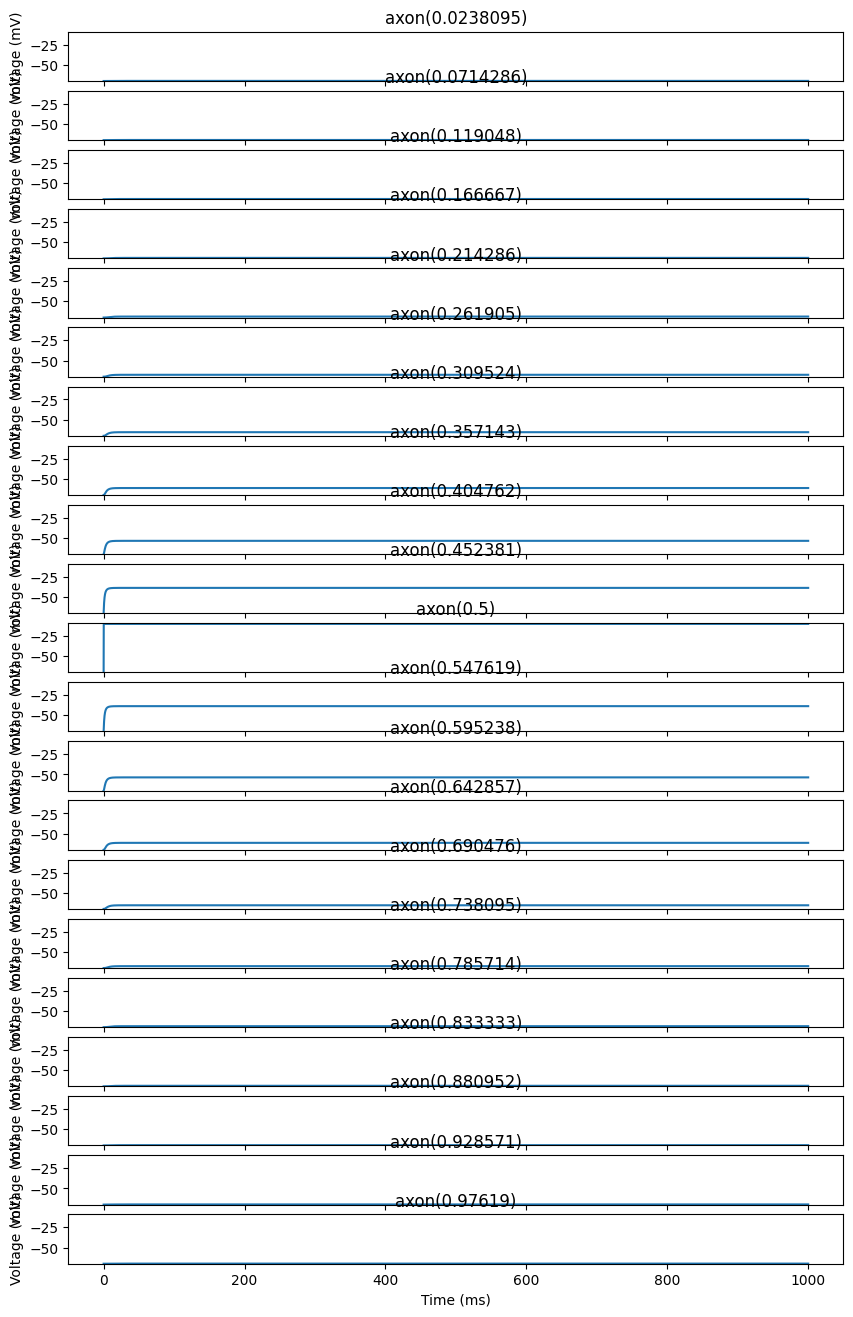

In [11]:
fig, axs = plt.subplots(axon.nseg, 1, figsize=(10, 16))  # 10 subplots stacked vertically, figure size is 10x20 inches

for i,seg in enumerate(axon):  # Assuming you have 10 segments in your axon
    axs[i].plot(t_vec, V_vecs[i])
    axs[i].set_title(seg)
    axs[i].set_xlabel('Time (ms)')
    axs[i].set_ylabel('Voltage (mV)')
    axs[i].set_ylim(-70,vc.amp[0]+1)

plt.tight_layout()  # Adjust layout for better visibility
plt.show()

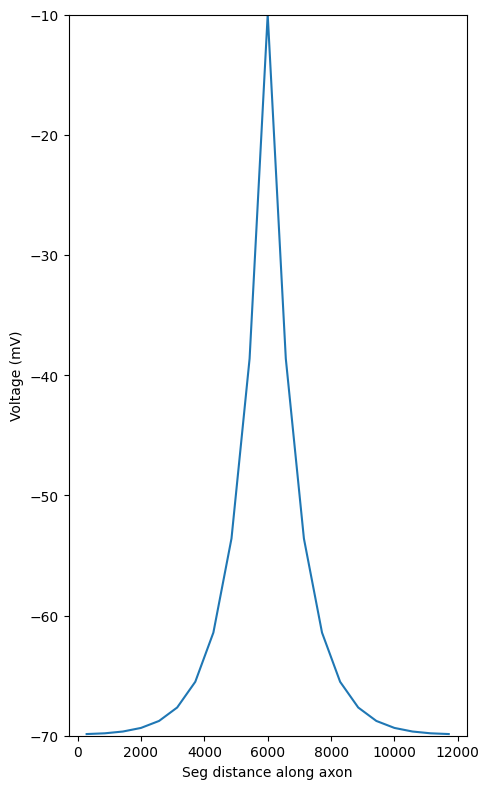

In [12]:
fig, ax = plt.subplots(figsize=(5, 8))

t = int(200/h.dt)  # time index to plot

x_values = [seg.x*axon.L for seg in axon]
y_values = [V_vecs[i][t] for i, seg in enumerate(axon)]

ax.plot(x_values, y_values)

ax.set_xlabel('Seg distance along axon')
ax.set_ylabel('Voltage (mV)')
ax.set_ylim(-70, vc.amp[0])

plt.tight_layout()
plt.show()

In [13]:
# print out the steady state voltage during voltage clamp
for i,seg in enumerate(axon):
  print(f"maximum V at {seg} ({seg.x*axon.L} away from 0):{max(V_vecs[i])} mv")

maximum V at axon(0.0238095) (285.7142857142857 away from 0):-69.86042520050268 mv
maximum V at axon(0.0714286) (857.1428571428571 away from 0):-69.79965794085696 mv
maximum V at axon(0.119048) (1428.5714285714284 away from 0):-69.65166692757013 mv
maximum V at axon(0.166667) (2000.0 away from 0):-69.35202069907513 mv
maximum V at axon(0.214286) (2571.428571428571 away from 0):-68.77026103344214 mv
maximum V at axon(0.261905) (3142.857142857143 away from 0):-67.65310481093981 mv
maximum V at axon(0.309524) (3714.285714285714 away from 0):-65.51417109115896 mv
maximum V at axon(0.357143) (4285.714285714286 away from 0):-61.4222234246712 mv
maximum V at axon(0.404762) (4857.142857142857 away from 0):-53.59573357572707 mv
maximum V at axon(0.452381) (5428.571428571428 away from 0):-38.62725018152094 mv
maximum V at axon(0.5) (6000.0 away from 0):-9.999882512602532 mv
maximum V at axon(0.547619) (6571.4285714285725 away from 0):-38.62725018152095 mv
maximum V at axon(0.595238) (7142.857142

Calculating Time Constant

Using the properties of the cable: membrane resistivity and intracellular resistivity

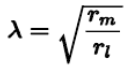

In [14]:
# calculate length constant from membrane resistance and axial resistance
Rm = 1/axon.g_pas # ohm / cm^2
Rm_in_m = Rm/10000 # convert to ohm / m^2
radius_in_m = (axon.diam / 2) * 1000000 # convert um to m
rm = Rm_in_m / (2 * np.pi * radius_in_m) # rm = Rm / (2 * pi * radius) # ohm / m

Ra_in_m = axon.Ra * 100 # convert ohm-cm to ohm-m
ra = Ra_in_m / (np.pi * (radius_in_m)**2)

length_constant = np.sqrt(rm / ra)
print(length_constant)

8.660254037844387


Using measured voltage

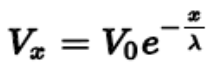

In [15]:
import math
# manually enter the values and check length constant
x = np.arange(0,axon.L,1)
V0 = -9.999804808622104 #vc.amp[0] # -1 mV
x = 4761.90476190477 # um
Vx = -60.70463425476422 # mV
length_constant = -x / math.log(Vx / V0)
print(length_constant)
# Vx = vc.amp[0]*e-(x/length_constant)

-2640.4352565983077


## Leak Current

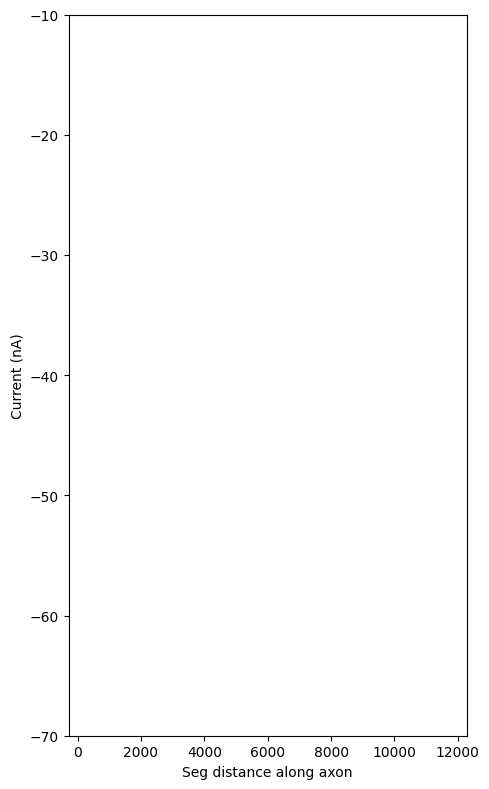

In [16]:
fig, ax = plt.subplots(figsize=(5, 8))

t = int(200/h.dt)  # time index to plot

x_values = [seg.x*axon.L for seg in axon]
y_values = [i_leak_vecs[i][t] for i, seg in enumerate(axon)]

ax.plot(x_values, y_values)

ax.set_xlabel('Seg distance along axon')
ax.set_ylabel('Current (nA)')
ax.set_ylim(-70, vc.amp[0])

plt.tight_layout()
plt.show()

## Axial Current

Charge flows from a point of higher voltage to a point of lower voltage.

Axial Current can be computed from the center of one compartment to the center of another using ohm's law: the difference in voltage divided by the combined half segment axial resistance

Half segment axial resistance is: .01*sec.Ra*(L/2/sec.nseg)/(PI*(seg.diam/2)^2)

Compute the current from segment to segment during time t

In [17]:
print(t_vec[t]) # 200 ms

199.99999999995504


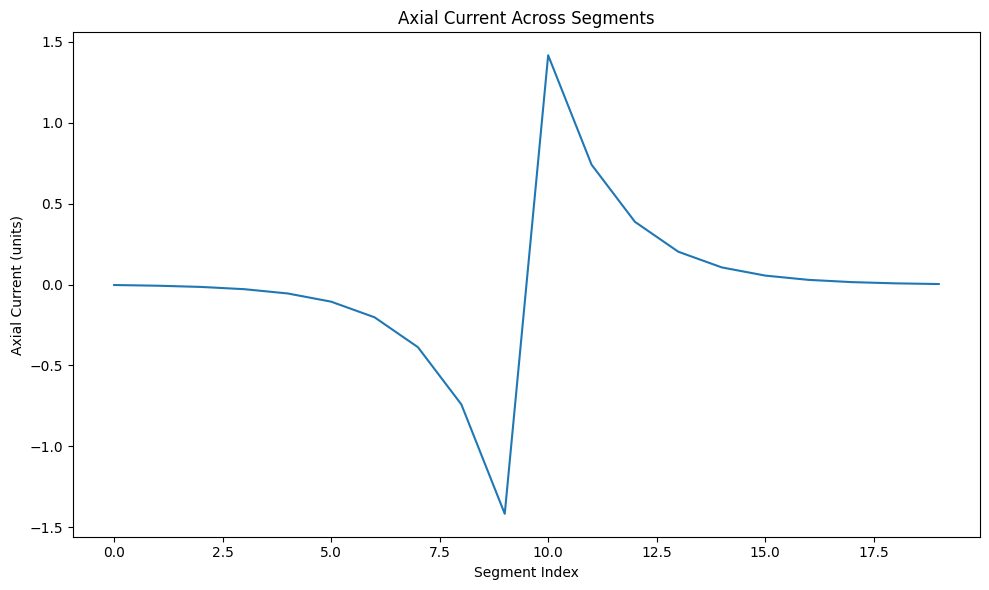

In [18]:
half_seg_Ras = [.01 * axon.Ra * (axon.L / 2 / axon.nseg) / (np.pi * (seg.diam / 2)**2) for seg in axon]
axial_I_values = []  # To store axial currents for plotting

for i, seg in enumerate(axon):
    if i+1 != axon.nseg:
        this_seg_V = V_vecs[i][t]
        next_seg_V = V_vecs[i+1][t]
        this_half_seg_Ra = half_seg_Ras[i]
        next_half_seg_Ra = half_seg_Ras[i+1]
        axial_I = (this_seg_V - next_seg_V) / (this_half_seg_Ra + next_half_seg_Ra)
        axial_I_values.append(axial_I)

# Now, plot the axial currents
fig, ax = plt.subplots(figsize=(10, 6))
segment_indices = range(len(axial_I_values))  # x-values for plot, assuming one value per segment
ax.plot(segment_indices, axial_I_values)
ax.set_xlabel('Segment Index')
ax.set_ylabel('Axial Current (units)')
ax.set_title('Axial Current Across Segments')

plt.tight_layout()
plt.show()

Note: we computed axial current going from left to right, and the axial current is flowing away from the middle.